In [25]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt

In [26]:
california_data = fetch_california_housing(as_frame=True)
data = california_data.frame

In [27]:
# Step 2: Define the coordinates of the major cities
cities = {
    "San Diego": (32.7157, -117.1611),
    "San Francisco": (37.7749, -122.4194),
    "Los Angeles": (34.0522, -118.2437),
    "San Jose": (37.3382, -121.8863),
    "Fresno": (36.7378, -119.7871),
    "Sacramento": (38.5816, -121.4944)
}

In [28]:
#define haversine formula to calculate distances
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points
    on the Earth's surface using the Haversine formula.
    Inputs are in degrees, output is in kilometers.
    """
    R = 6371.0  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

In [29]:
# Step 4: Add a function to calculate the minimum distance to the nearest city
def calculate_city_distances(row):
    lat, lon = row['Latitude'], row['Longitude']
    distances = {city: haversine(lat, lon, lat_city, lon_city) 
                 for city, (lat_city, lon_city) in cities.items()}
    return pd.Series(distances)

In [30]:
# Step 5: Apply the function to the dataset
city_distances = data.apply(calculate_city_distances, axis=1)

In [31]:
# Step 6: Merge the new distance columns into the original dataset
data = pd.concat([data, city_distances], axis=1)

In [32]:
# Step 7: Save the enhanced dataset as a CSV file
data.to_csv('california_housing_with_city_distances.csv', index=False)

In [33]:
# Step 8: Print a preview of the dataset
#print(data.head(20))

# Print rows 20 to 40 (row indices 20 to 39)
print(data.iloc[2000:2040])

      MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
2000  2.5045      15.0  4.103933   1.165730       924.0  2.595506     36.74   
2001  1.2375      35.0  4.459916   1.067511      2050.0  4.324895     36.75   
2002  1.2813      31.0  3.627907   0.979328      1515.0  3.914729     36.75   
2003  1.0513      35.0  2.951557   1.024221      1228.0  4.249135     36.74   
2004  2.1094      52.0  2.059524   1.035714       401.0  4.773810     36.74   
2005  0.7990      25.0  3.645435   1.150743      1343.0  2.851380     36.74   
2006  1.3527      41.0  3.711409   1.042506      1391.0  3.111857     36.75   
2007  1.1230      33.0  3.736407   1.104019      3530.0  4.172577     36.75   
2008  1.8967      52.0  5.000000   1.049180       406.0  3.327869     36.74   
2009  1.6435      25.0  5.070727   1.037328      1642.0  3.225933     36.72   
2010  2.6176      17.0  5.361345   1.016807       927.0  3.894958     36.72   
2011  2.4137      21.0  5.386076   1.132911      134

In [34]:
# Define target column (y) and feature columns (X)
target_column = "MedHouseVal"  # This is the target column
X = data.drop(columns=[target_column])  # Drop the target column to get features
y = data[target_column]  # Extract the target column

In [82]:
#Define the pipeline
pipe = Pipeline([
    ("scale", QuantileTransformer(n_quantiles=500)),
    ("model", Ridge(alpha=1.25))
])

In [83]:
pipe.fit(X, y)

Pipeline(steps=[('scale', QuantileTransformer(n_quantiles=500)),
                ('model', Ridge(alpha=1.25))])

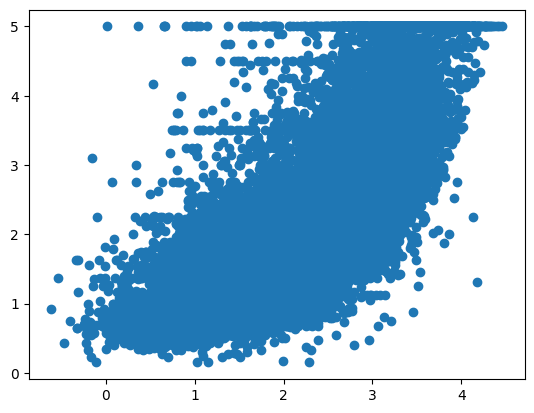

In [84]:
pred = pipe.predict(X)
plt.scatter(pred, y)

In [71]:
#use GridSearchCV
mod = GridSearchCV(estimator=pipe,
    param_grid={'model__alpha':[0.1,0.5,0.75,1,1.25,1.5,1.75,2,5,10,15,25,50,100,250]},
    cv = 5)

In [76]:
#X, y = fetch_california_housing(return_X_y=True)
mod.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', QuantileTransformer()),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [0.1, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2,
                                          5, 10, 15, 25, 50, 100, 250],
                         'scale__n_quantiles': [100, 250, 500, 1000]})

In [77]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_scale__n_quantiles,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020644,0.003507,0.003682,0.000603,0.10,100,"{'model__alpha': 0.1, 'scale__n_quantiles': 100}",0.463470,0.439928,0.585264,0.567420,0.594151,0.530047,0.064975,22
1,0.020297,0.000154,0.003806,0.000115,0.10,250,"{'model__alpha': 0.1, 'scale__n_quantiles': 250}",0.463318,0.436294,0.585473,0.566629,0.591998,0.528742,0.065547,37
2,0.022907,0.000325,0.004212,0.000201,0.10,500,"{'model__alpha': 0.1, 'scale__n_quantiles': 500}",0.466063,0.436891,0.585721,0.568685,0.593700,0.530212,0.065446,15
3,0.026153,0.000305,0.004679,0.000064,0.10,1000,"{'model__alpha': 0.1, 'scale__n_quantiles': 1000}",0.464943,0.438185,0.586054,0.570644,0.594315,0.530828,0.065711,4
4,0.018296,0.000159,0.003416,0.000079,0.50,100,"{'model__alpha': 0.5, 'scale__n_quantiles': 100}",0.465989,0.437825,0.586867,0.567224,0.593461,0.530273,0.065177,13
5,0.021308,0.000676,0.004045,0.000127,0.50,250,"{'model__alpha': 0.5, 'scale__n_quantiles': 250}",0.465353,0.435014,0.586224,0.570578,0.596156,0.530665,0.066908,6
6,0.022998,0.000225,0.004259,0.000205,0.50,500,"{'model__alpha': 0.5, 'scale__n_quantiles': 500}",0.466058,0.434947,0.585147,0.567859,0.593906,0.529584,0.065850,24
7,0.026244,0.000354,0.004797,0.000117,0.50,1000,"{'model__alpha': 0.5, 'scale__n_quantiles': 1000}",0.465102,0.439462,0.584303,0.568277,0.594674,0.530363,0.064815,9
8,0.017831,0.000357,0.003282,0.000118,0.75,100,"{'model__alpha': 0.75, 'scale__n_quantiles': 100}",0.464813,0.436659,0.583538,0.567364,0.592202,0.528915,0.064942,35
9,0.020561,0.000253,0.003842,0.000058,0.75,250,"{'model__alpha': 0.75, 'scale__n_quantiles': 250}",0.466042,0.437677,0.586414,0.568329,0.592905,0.530274,0.065150,12
